In [60]:
# import os
import pandas as pd
import os

# Define the root output directory containing the folders with abundance.tsv files
output_dir = 'IBDMDB_Kallisto_output'

# Initialize an empty list to store the extracted data
data = []

# Iterate over each directory in the output directory
for folder_name in os.listdir(output_dir):
    folder_path = os.path.join(output_dir, folder_name)
    if os.path.isdir(folder_path):
        # Extract the input filename and sequence from the folder name
        try:
            input_filename = folder_name.split('output_')[1].split('_contigs')[0]
            sequence_part = folder_name.split('contigs_')[1]
            if "_" in sequence_part:
                sequence = sequence_part.split('_')[0]
            else:
                sequence = sequence_part

            # Read the abundance.tsv file
            abundance_file = os.path.join(folder_path, 'abundance.tsv')
            if os.path.exists(abundance_file):
                df = pd.read_csv(abundance_file, sep='\t')
                # Filter rows where the first column contains '_target'
                target_row = df[df.iloc[:, 0].str.contains('_target')]
                if not target_row.empty:
                    # Extract the relevant information
                    target_data = target_row.iloc[0].to_dict()
                    # Append the extracted information to the data list
                    data.append({
                        'Input Filename': input_filename,
                        'Sequence': sequence,
                        **target_data
                    })
        except IndexError:
            print(f"Error processing folder: {folder_name}")
            continue

# Convert the list of dictionaries to a pandas DataFrame
df_results = pd.DataFrame(data)

# Display the DataFrame
df_results

KeyboardInterrupt: 

In [3]:
# # save to csv
# df_results.to_csv('IBDMDB_Kallisto_analysis.csv', index=False)

In [1]:
# load from csv
import pandas as pd
df = pd.read_csv('IBDMDB_Kallisto_analysis.csv')
df


,Input Filename,Sequence,target_id,length,eff_length,est_counts,tpm
0,CSM7KORG,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_18087_target,393,263.0410,0.0,0.00000
1,HSM7J4MC,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_8447_target,222,84.9642,4.0,7.05166
2,MSM79H5G,TTTTTAATATTATTATTTATGAAAGAACTAAATTTGAAACAGATGG...,k105_7_target,240,104.4190,3.0,6.20121
3,PSM6XBSE,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_15809_target,222,84.8354,4.0,35.53950
4,HSMA33OZ,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_9686_target,222,74.2122,3.0,17.53510
...,...,...,...,...,...,...,...
443,MSM79HDI,TTGATTTTGGATGGAGGGATATTTTTGATGGAAGACGAAATAACAA...,k105_24444_target,219,90.4862,0.0,0.00000
444,CSM9X1XU,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_4980_target,222,72.3975,9.0,14.18190
445,CSM67UA2,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_6562_target,222,76.1688,0.0,0.00000
446,MSMB4LZ8,ATGAAAAAATTAGGAAAATTAAAGCTGAACAATTTCAGTGAAATGA...,k105_20945_target,249,130.9230,0.0,0.00000


In [2]:
# load cluster csv
df_cluster = pd.read_csv('../../../../rebase/MicSearch/analysis/IBDMDB/data/ibdmbd_results_cluster_analysis_feb26.csv')
df_cluster[['dna', 'Cluster']]
df_dna_clust = df_cluster[['dna', 'Cluster', 'id']]
# shorten dna to 50 characters
df_dna_clust['dna'] = df_dna_clust['dna'].str[:50]
df_dna_clust['id'] = df_dna_clust['id'].str.split('_cont').str[0].str.replace('{', '')
df_dna_clust

/tmp/ipykernel_1845114/2505014271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dna_clust['dna'] = df_dna_clust['dna'].str[:50]
/tmp/ipykernel_1845114/2505014271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dna_clust['id'] = df_dna_clust['id'].str.split('_cont').str[0].str.replace('{', '')


,dna,Cluster,id
0,GCAGGTATAAGAGAATTAACTTTAGATGAGATAACGCTTGTCAGCG...,21,MSM6J2MJ
1,ATGGCAGGTATAAGAGAATTAACTTTAGATGAGATAACGCTTGTCA...,21,CSM79HJI_P
2,ATGGCAGGTATAAGAGAATTAACTTTAGATGAGATAACGCTTGTCA...,21,MSM5LLF2_P
3,ATGGCAGGTATAAGAGAATTAACTTTAGATGAGATAACGCTTGTCA...,21,MSM5LLF4
4,ATGGCAGGTATAAGAGAATTAACTTTAGATGAGATAACGCTTGTCA...,21,MSM5LLF6
...,...,...,...
1036,CTCAATATCCGCATTCGAAAGATAACCGAAAATGAAATTCAAAAAG...,33,MSM5LLDC
1037,ATGCGCGACAAGGGCATTGCTCACATCGGTATCGGCGAAGGTAAAG...,36,HSM5MD6I_P
1038,TTGATTTTGGATGGAGGGATATTTTTGATGGAAGACGAAATAACAA...,38,HSMA33KE
1039,ATACTTATCAGTTTGAGTAAGACTGAATTACAGAACATTAATGGTG...,54,CSM67UEA


In [5]:
# merge left df on Sequence, right on dna and only include Cluster from right

df_merge = pd.merge(df, df_dna_clust, left_on=['Sequence', 'Input Filename'], right_on=['dna', 'id'], how='left')
# remove duplicate rows
df_merge = df_merge.drop_duplicates(subset=['Input Filename', 'Sequence', 'target_id', 'length', 'eff_length', 'est_counts', 'tpm', 'Cluster']).reset_index(drop=True)
# drop dna column
df_merge = df_merge.drop(columns=['dna'])
df_merge


,Input Filename,Sequence,target_id,length,eff_length,est_counts,tpm,Cluster,id
0,CSM7KORG,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_18087_target,393,263.0410,0.0,0.00000,48,CSM7KORG
1,HSM7J4MC,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_8447_target,222,84.9642,4.0,7.05166,48,HSM7J4MC
2,MSM79H5G,TTTTTAATATTATTATTTATGAAAGAACTAAATTTGAAACAGATGG...,k105_7_target,240,104.4190,3.0,6.20121,48,MSM79H5G
3,PSM6XBSE,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_15809_target,222,84.8354,4.0,35.53950,48,PSM6XBSE
4,HSMA33OZ,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_9686_target,222,74.2122,3.0,17.53510,48,HSMA33OZ
...,...,...,...,...,...,...,...,...,...
392,MSM79HDI,TTGATTTTGGATGGAGGGATATTTTTGATGGAAGACGAAATAACAA...,k105_24444_target,219,90.4862,0.0,0.00000,25,MSM79HDI
393,CSM9X1XU,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_4980_target,222,72.3975,9.0,14.18190,48,CSM9X1XU
394,CSM67UA2,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_6562_target,222,76.1688,0.0,0.00000,48,CSM67UA2
395,MSMB4LZ8,ATGAAAAAATTAGGAAAATTAAAGCTGAACAATTTCAGTGAAATGA...,k105_20945_target,249,130.9230,0.0,0.00000,35,MSMB4LZ8


In [37]:
# save df_merge to csv
# df_merge.to_csv('IBDMDB_Kallisto_analysis_clusters.csv', index=False)

In [65]:
df_work = pd.read_csv('IBDMDB_Kallisto_analysis_clusters.csv')
df_work
# remove any with est_counts = 0
df_work = df_work[df_work['est_counts'] != 0]
df_work

,Input Filename,Sequence,target_id,length,eff_length,est_counts,tpm,Cluster,id,Origin,Species,Species_cluster
0,MSM9VZHX,ATGAAAAAATTAGGAAAATTAAAGCTGAACAATTTCAGTGAAATGA...,k105_20940_target,249,91.4876,4,17.561700,35,MSM9VZHX,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus (#35)
1,MSM5LLDI,ATGAAAAAATTAGGAAAATTAAAGCTGAACAATTTCAGTGAAATGA...,k105_2857_target,249,129.5220,1,17.159300,35,MSM5LLDI,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus (#35)
2,MSM79H7G,ATGAAAAAATTAGGAAAATTAAAGCTGAACAATTTCAGTGAAATGA...,k105_1661_target,249,101.1570,4,11.030300,35,MSM79H7G,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus (#35)
3,MSM9VZKI,ATGAAAAAATTAGGAAAATTAAAGCTGAACAATTTCAGTGAAATGA...,k105_19288_target,249,106.3110,3,5.825240,35,MSM9VZKI,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus (#35)
4,MSMAPC7T,ATGAAAAAATTAGGAAAATTAAAGCTGAACAATTTCAGTGAAATGA...,k105_10280_target,249,120.1830,6,3.208330,35,MSMAPC7T,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus (#35)
...,...,...,...,...,...,...,...,...,...,...,...,...
200,CSM79HPA,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_40471_target,222,99.6397,1,1.018370,48,CSM79HPA,Phocaeicola vulgatus,Phocaeicola vulgatus,Phocaeicola vulgatus (#48)
201,MSMB4LYH,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_77746_target,222,90.4509,2,0.957935,48,MSMB4LYH,Phocaeicola vulgatus,Phocaeicola vulgatus,Phocaeicola vulgatus (#48)
202,HSM7J4NO,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_1959_target,222,103.3660,1,0.778865,48,HSM7J4NO,Phocaeicola vulgatus,Phocaeicola vulgatus,Phocaeicola vulgatus (#48)
203,MSM9VZMA,ATGAAAGAACTAAATTTGAAACAGATGGAATCTGTCAATGGTGGTC...,k105_11120_target,249,137.9870,2,0.668042,48,MSM9VZMA,Phocaeicola vulgatus,Phocaeicola vulgatus,Phocaeicola vulgatus (#48)


In [69]:
# make a sum of tpm for each cluster
df_sum = df_work.groupby('Cluster').agg({'tpm': 'sum'}).reset_index()
df_sum

,Cluster,tpm
0,4,3.691930
1,7,3.644890
2,12,5.956390
3,16,14.150930
4,18,266.172000
5,21,90.942590
6,22,5.373710
7,24,9.313670
8,25,18.307770
9,35,55.981474


/tmp/ipykernel_1595714/183976827.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_sum, x='Cluster', y='tpm', ci='sd', ax=ax, order=df_sum['Cluster'])


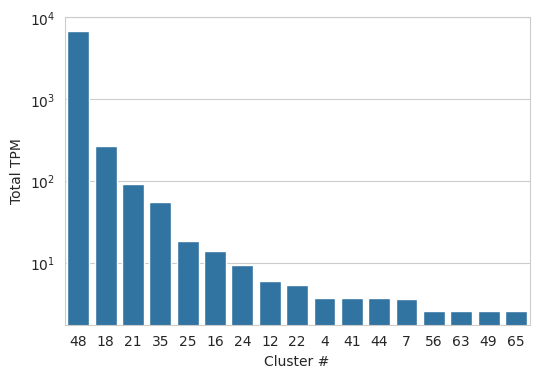

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# make bar plot

# order ascending
df_sum = df_sum.sort_values('tpm', ascending=False)

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar plot of the sum of TPM values for each sequence
sns.barplot(data=df_sum, x='Cluster', y='tpm', ci='sd', ax=ax, order=df_sum['Cluster'])


# set y axis to log
ax.set_yscale('log')

# Set the title and labels of the plot
ax.set_xlabel('Cluster #')
ax.set_ylabel('Total TPM')

# Rotate the x-axis labels for better

# save plot
plt.savefig('IBDMDB_Kallisto_analysis_tpm_barplot.svg', bbox_inches='tight')


In [39]:
# count cluster values
df_merge['Cluster'].value_counts()
# to df
df_cluster_count = pd.DataFrame(df_merge['Cluster'].value_counts())
df_cluster_count = df_cluster_count.reset_index()
df_cluster_count.columns = ['Cluster', 'Count']
df_cluster_count

,Cluster,Count
0,48,251
1,35,21
2,56,13
3,65,12
4,12,9
5,22,9
6,16,7
7,18,6
8,21,6
9,25,6


In [41]:
# group by cluster and calculate mean of tpm and keep count of cluster
df_cluster_tpm = df_merge.groupby('Cluster')['tpm'].mean().reset_index()
df_cluster_tpm
# merge count and tpm
df_cluster_tpm = pd.merge(df_cluster_tpm, df_cluster_count, on='Cluster')
df_cluster_tpm

# sort by Count
df_cluster_tpm = df_cluster_tpm.sort_values('tpm', ascending=False)
df_cluster_tpm

,Cluster,tpm,Count
11,18,44.362000,6
30,48,27.392565,251
13,21,15.157098,6
16,24,4.656835,2
28,44,3.691930,1
17,25,3.051295,6
23,35,2.799074,21
31,49,2.606310,1
38,63,2.606310,1
9,16,2.021561,7


In [73]:
# save to csv
df_cluster_tpm.to_csv('IBDMDB_Kallisto_analysis_cluster_tpm.csv', index=False)

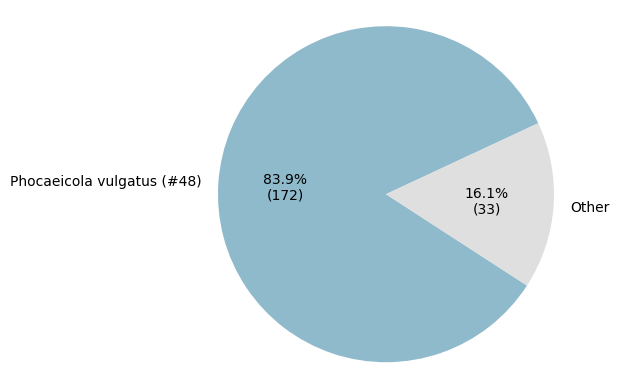

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

colors = ['#8fbacc', '#dfdfdf']

# load cluster csv
df_work = pd.read_csv('IBDMDB_Kallisto_analysis_clusters.csv')

df_work = df_work[df_work['est_counts'] > 0]

# replace anything other than 'Phocaeicola vulgatus' or 'No Match' with Other
df_work['Species_cluster'] = df_work['Species_cluster'].apply(
    lambda x: x if 'Phocaeicola vulgatus' in x else 'Other'
)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_work['Species_cluster'].value_counts().index
sizes = df_work['Species_cluster'].value_counts().values


def autopct_format(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f'{pct:.1f}%\n({absolute})'


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: autopct_format(pct, sizes),
        shadow=False, startangle=25, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

# save to file
fig1.savefig('IBDMDB_Kallisto_analysis_clusters_pie.svg')

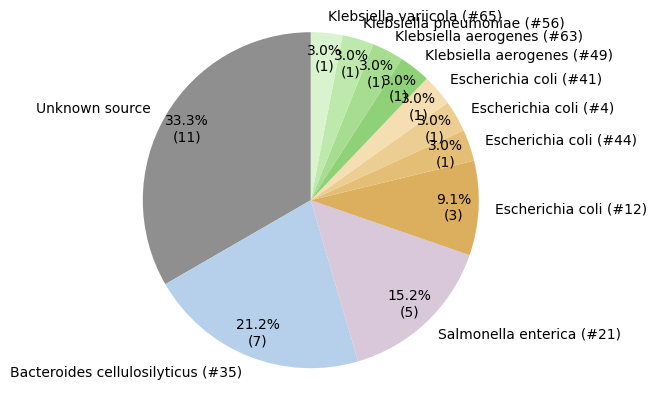

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# make a list of colors from cm with one blue, one purple, 4 yellow, 4 green
blue = ['#b6d0ec']
purple = ['#d8c8d9']
yellow = ['#dbaf5d', '#e5be76', '#edce92', '#f5deb2']
# ['#dfb476', '#e0bf81', '#e2c98e', '#e4d39b']
green = ['#8fd176', '#a6dd90', '#bee9ad', '#d8f3ce']

# ['#9ad679', '#a1de89', '#a9e498', '#b2eaa8']
# ['#e7ab81', '#eeba96', '#f4caac', '#f9d9c3']
grey = ['#dfdfdf']
dark_grey = ['#8f8f8f']
colors = np.concatenate([dark_grey, blue, purple, yellow, green])

# Load cluster CSV
df_work = pd.read_csv('IBDMDB_Kallisto_analysis_clusters.csv')
df_work = df_work[df_work['est_counts'] > 0]

# Filter rows where 'Species_cluster' contains 'Phocaeicola vulgatus'
df_work = df_work[~df_work['Species_cluster'].str.contains('Phocaeicola vulgatus', na=False)]

# # Filter rows where 'Species_cluster' contains 'No Match'
# df_work = df_work[~df_work['Species_cluster'].str.contains('No Match', na=False)]
# if string contains 'No Match' replace with 'Unknown source'
df_work['Species_cluster'] = df_work['Species_cluster'].apply(
    lambda x: x if 'No Match' not in x else 'Unknown source'
)

# Make a pie chart of species
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_work['Species_cluster'].value_counts().index
sizes = df_work['Species_cluster'].value_counts().values

# reorder labels and sizes to put 5-8 at the end
labels = np.concatenate([labels[:5], labels[9:], labels[5:9]])
sizes = np.concatenate([sizes[:5], sizes[9:], sizes[5:9]])

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: autopct_format(pct, sizes),
        shadow=False, startangle=90, colors=colors, pctdistance=0.85)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# save
fig1.savefig('IBDMDB_Kallisto_analysis_clusters_pie_species.svg')
